# [Paris Saclay Center for Data Science](http://www.datascience-paris-saclay.fr)

## [Fake news RAMP](http://www.ramp.studio/problems/fake_news): classify fake news

_Emanuela Boros (LIMSI/CNRS), Balázs Kégl (LAL/CNRS)_

## Introduction
This is an initiation project to introduce RAMP and get you to know how it works.

The goal is to develop prediction models able to **identify which news is fake**. 

The data we will manipulate is from http://www.politifact.com. The input contains of short statements of public figures (and sometimes anomymous bloggers), plus some metadata. The output is a truth level, judged by journalists at Politifact. They use six truth levels which we coded into integers to obtain an [ordinal regression](https://en.wikipedia.org/wiki/Ordinal_regression) problem:
```
0: 'Pants on Fire!'
1: 'False'
2: 'Mostly False'
3: 'Half-True'
4: 'Mostly True'
5: 'True'
```
You goal is to classify each statement (+ metadata) into one of the categories.

### Requirements

* numpy>=1.10.0  
* matplotlib>=1.5.0 
* pandas>=0.19.0  
* scikit-learn>=0.17 (different syntaxes for v0.17 and v0.18)   
* seaborn>=0.7.1
* nltk

Further, an nltk dataset needs to be downloaded:

```
python -m nltk.downloader popular
```

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Exploratory data analysis

### Loading the data

In [85]:
train_filename = 'data/train.csv'
data = pd.read_csv(train_filename, sep='\t')
data = data.fillna('')
data['date'] = pd.to_datetime(data['date'])
data

,1,3,2,4,0,5,date,edited_by,job,researched_by,source,state,statement,subjects,truth
0,41,33,31,41,11,24,2013-08-29,Angie Drobnic Holan,Republican,Jon Greenberg,Scott Walker,Wisconsin,"In the Wisconsin health insurance exchange, ""t...",['Health Care'],3
1,5,9,12,3,3,8,2013-08-29,Angie Drobnic Holan,Republican,Louis Jacobson,Mike Huckabee,Arkansas,"""America’s gun-related homicide rate … would b...","['Crime', 'Guns', 'Pundits']",0
2,0,0,0,1,0,1,2013-08-29,Greg Borowski,,Tom Kertscher,League of Conservation Voters,,Says U.S. Sen. Ron Johnson voted to let oil an...,"['Climate Change', 'Energy', 'Environment', 'T...",5
3,10,8,17,5,8,4,2013-08-28,Aaron Sharockman,,Rochelle Koff,National Republican Congressional Committee,,"""Congressman Patrick Murphy voted to keep the ...",['Health Care'],2
4,0,1,0,1,1,0,2013-08-28,Aaron Sharockman,,Angie Drobnic Holan,Janet Napolitano,,"The 2010 DREAM Act failed despite ""strong bipa...","['Bipartisanship', 'Immigration']",2
5,2,0,1,0,1,0,2013-08-28,W. Gardner Selby,Republican,Sue Owen,Steve Stockman,Texas,"Says U.N. arms treaty will mandate a ""new inte...",['Guns'],1
6,0,0,0,1,0,0,2013-08-28,Greg Borowski,Democrat,Dave Umhoefer,Mark Harris,Wisconsin,"""I’ve got the spending down, I’ve got the debt...","['County Budget', 'County Government', 'Debt',...",4
7,0,0,0,0,0,0,2013-08-28,"Jim Denery, Jim Tharpe",Democrat,Eric Stirgus,Doug Stoner,Georgia,"""I fought hard for that (state Senate) seat. I...","['Campaign Finance', 'Candidate Biography']",2
8,0,0,0,1,0,0,2013-08-27,Angie Drobnic Holan,None,Louis Jacobson,Moms Demand Action for Gun Sense In America,Indiana,"The book Little Red Riding Hood is something ""...","['Education', 'Guns']",2
9,0,1,0,0,0,0,2013-08-27,Angie Drobnic Holan,,Julie Kliegman,BookerFail,,"""Three years after getting the $100 million (f...",['Education'],2


In [68]:
data.dtypes

1                         int64
3                         int64
2                         int64
4                         int64
0                         int64
5                         int64
date             datetime64[ns]
edited_by                object
job                      object
researched_by            object
source                   object
state                    object
statement                object
subjects                 object
truth                     int64
dtype: object

In [69]:
data.describe()

,1,3,2,4,0,5,truth
count,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000,7569.000000
mean,12.059849,18.396486,11.006077,17.552781,5.979654,14.037654,2.740917
std,19.946155,39.658750,18.780401,40.485977,18.674676,30.513549,1.588681
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2.000000,3.000000,2.000000,3.000000,1.000000,2.000000,3.000000
75%,15.000000,11.000000,11.000000,11.000000,6.000000,10.000000,4.000000
max,153.000000,160.000000,98.000000,165.000000,174.000000,123.000000,5.000000


In [70]:
data.count()

1                7569
3                7569
2                7569
4                7569
0                7569
5                7569
date             7569
edited_by        7569
job              7569
researched_by    7569
source           7569
state            7569
statement        7569
subjects         7569
truth            7569
dtype: int64

The original training data frame has 13000+ instances. In the starting kit, we give you a subset of 7569 instances for training and 2891 instances for tesing.

Most columns are categorical, some have high cardinalities.

['' 'Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'Rhode island'
 'South Carolina' 'South Dakota' 'Tennesse' 'Tennessee' 'Texas'
 'United Kingdom' 'Utah' 'Vermont' 'Virgina' 'Virginia' 'Washington'
 'Washington state' 'Washington, D.C.' 'West Virginia' 'Wisconsin'
 'Wyoming' 'ohio' 'the United States']
60


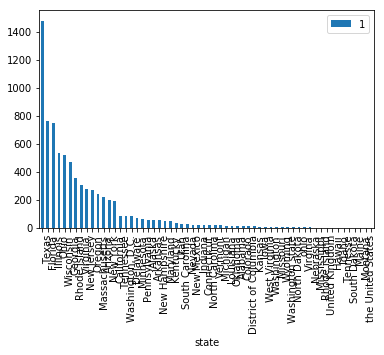

In [112]:
print(np.unique(data['state']))
print(len(np.unique(data['state'])))
data.groupby('state').count()[['1']].sort_values(
    '1', ascending=False).reset_index().plot.bar(
        x='state', y='1');

['' 'Activist' 'Business leader' 'Columnist' 'Constitution Party'
 'Democrat' 'Democratic Farmer-Labor' 'Independent' 'Journalist'
 'Labor leader' 'Libertarian' 'Newsmaker' 'None'
 'Ocean State Tea Party in Action' 'Organization' 'Republican'
 'State official' 'Talk show host' 'Tea Party member' 'county commissioner']
20


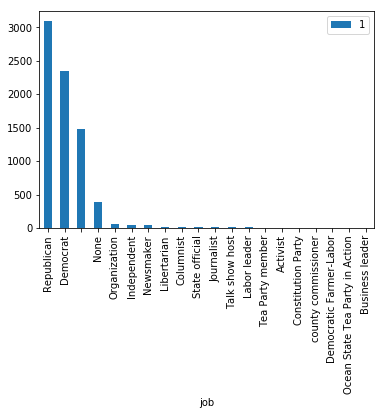

In [111]:
print(np.unique(data['job']))
print(len(np.unique(data['job'])))
data.groupby('job').count()[['1']].sort_values(
    '1', ascending=False).reset_index().plot.bar(
        x='job', y='1');

If you want to use the journalist and the editor as input, you will need to split the lists since somtimes there are more than one of them on an instance.

['' 'Aaron Sharockman' 'Adriel Bettelheim, Amy Hollyfield' 'Alexander Lane'
 'Amy Hollyfield' 'Amy Hollyfield, Aaron Sharockman'
 'Amy Hollyfield, Greg Joyce' 'Amy Hollyfield, Scott Montgomery'
 'Amy Sherman' 'Angie Drobnic Holan'
 'Angie Drobnic Holan, Aaron Sharockman'
 'Angie Drobnic Holan, Elizabeth Miniet, Jim Tharpe' 'Bill Adair'
 'Bill Adair, Aaron Sharockman' 'Bill Adair, Amy Hollyfield'
 'Bill Adair, Angie Drobnic Holan' 'Bill Adair, Martha M. Hamilton'
 'Bill Adair, Scott Montgomery' 'Bill Adair, Sergio Bustos'
 'Bill Adair, Steve Ahillen, Zack McMillin' 'Bill Adair, Tom Chester'
 'Bill Adair, Tom Chester, Michael Erskine' 'Bill Adair, W. Gardner Selby'
 'Bill Adair, Zack McMillin' 'Bill Duryea' 'Bob Gee' 'Brenda Bell'
 'Brenda Bell, Jody Seaborn' 'Brenda Bell, W. Gardner Selby'
 'Bridget Hall Grumet' 'Bridget Hall Grumet, Angie Drobnic Holan'
 'Bruce  Hammond' 'C. Eugene Emery Jr.' 'Caryn Shinske' 'Catharine Richert'
 'Charles Gay' 'Charles Gay, Elizabeth Miniet' 'Chris Quin

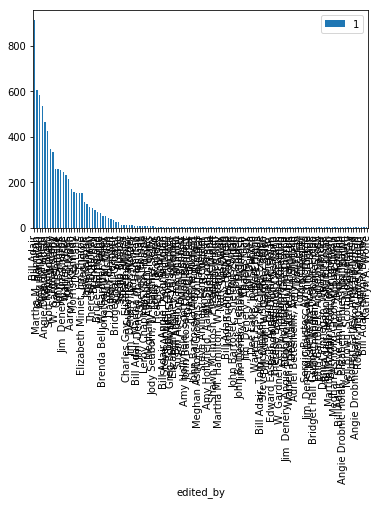

In [110]:
print(np.unique(data['edited_by']))
print(len(np.unique(data['edited_by'])))
data.groupby('edited_by').count()[['1']].sort_values(
    '1', ascending=False).reset_index().plot.bar(
        x='edited_by', y='1');

['' 'Aaron Marshall' 'Aaron Sharockman' 'Aaron Sharockman, Amy Sherman'
 'Adriel Bettelheim' 'Adriel Bettelheim, Angie Drobnic Holan'
 'Adriel Bettelheim, David DeCamp' 'Adriel Bettelheim, Ryan Kelly'
 'Alaina Berner, Christopher Connors, Louis Jacobson' 'Alex Holt'
 'Alex Holt, Louis Jacobson' 'Alex Holt, Michelle Sutherland'
 'Alex Kuffner' 'Alex Leary' 'Alexander Lane' 'Amy Hollyfield'
 'Amy Sherman' 'Amy Sherman, Bartholomew Sullivan' 'Andra Lim'
 'Angie Drobnic Holan' 'Angie Drobnic Holan, Aaron Sharockman'
 'Angie Drobnic Holan, Alex Leary' 'Angie Drobnic Holan, Alexander Lane'
 'Angie Drobnic Holan, Amy Sherman'
 'Angie Drobnic Holan, Amy Sherman, Dave Umhoefer'
 'Angie Drobnic Holan, Catharine Richert'
 'Angie Drobnic Holan, Craig Pittman'
 'Angie Drobnic Holan, David G. Taylor'
 'Angie Drobnic Holan, Ian K. Kullgren'
 'Angie Drobnic Holan, Jeffrey S.  Solochek'
 'Angie Drobnic Holan, John Martin' 'Angie Drobnic Holan, Katie Sanders'
 'Angie Drobnic Holan, Louis Jacobson'
 'Ang

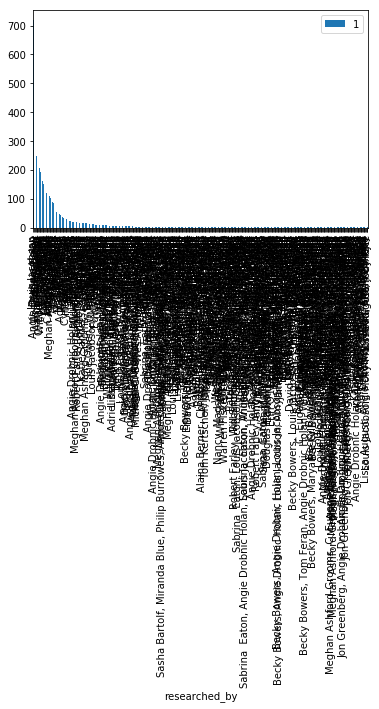

In [108]:
print(np.unique(data['researched_by']))
print(len(np.unique(data['researched_by'])))
data.groupby('researched_by').count()[['1']].sort_values(
    '1', ascending=False).reset_index().plot.bar(
        x='researched_by', y='1');

There are 2000+ different sources.

In [109]:
print(np.unique(data['source']))
print(len(np.unique(data['source'])))
data.groupby('source').count()[['1']].sort_values('1', ascending=False)

['13th District GOP slate' '18% of the American public'
 '60 Plus Association' ..., 'Zell Miller' 'Zoe Lofgren' 'billhislam.com']
2124


,1
source,
Barack Obama,483
Mitt Romney,200
John McCain,168
Chain email,144
Rick Perry,139
Rick Scott,91
Chris Christie,85
Hillary Clinton,85
Scott Walker,75


### Predicting truth level

The goal is to predict the truthfulness of statements. Let us group the data according to the `truth` columns:

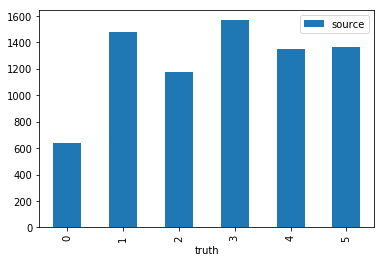

In [86]:
data.groupby('truth').count()[['source']].reset_index().plot.bar(x='truth', y='source');

To help you to assess the history of sources, the data contains the number of times the source released a statement, up to the date of the statement (excluding the last statement) for each of the six truth levels. 

In [90]:
data[['0', '1', '2', '3', '4', '5']]

,0,1,2,3,4,5
0,11,41,31,33,41,24
1,3,5,12,9,3,8
2,0,0,0,0,1,1
3,8,10,17,8,5,4
4,1,0,0,1,1,0
5,1,2,1,0,0,0
6,0,0,0,0,1,0
7,0,0,0,0,0,0
8,0,0,0,0,1,0
9,0,0,0,1,0,0


## The pipeline

For submitting at the [RAMP site](http://ramp.studio), you will have to write two classes, saved in two different files:   
* the class `FeatureExtractor`, which will be used to extract features for classification from the dataset and produce a numpy array of size (number of samples $\times$ number of features). 
* a class `Classifier` to predict 

### Feature extractor

The feature extractor implements a `transform` member function. It is saved in the file [`submissions/starting_kit/feature_extractor.py`](/edit/submissions/starting_kit/feature_extractor.py). It receives the pandas dataframe `X_df` defined at the beginning of the notebook. It should produce a numpy array representing the extracted features, which will then be used for the classification.  

Note that the following code cells are *not* executed in the notebook. The notebook saves their contents in the file specified in the first line of the cell, so you can edit your submission before running the local test below and submitting it at the RAMP site.

### Classifier

The classifier follows a classical scikit-learn classifier template. It should be saved in the file [`submissions/starting_kit/classifier.py`](/edit/submissions/starting_kit/classifier.py). In its simplest form it takes a scikit-learn pipeline, assigns it to `self.clf` in `__init__`, then calls its `fit` and `predict_proba` functions in the corresponding member funtions.

In [18]:
%%file submissions/starting_kit/classifier.py


UsageError: %%file is a cell magic, but the cell body is empty.
